In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from matplotlib.patches import Patch

## Data

In [13]:
multi = pd.read_csv('rmlp_emb_multi_1.csv')
single = pd.read_csv('rmlp_emb_uni_1.csv')

properties = single.columns

## Visualization

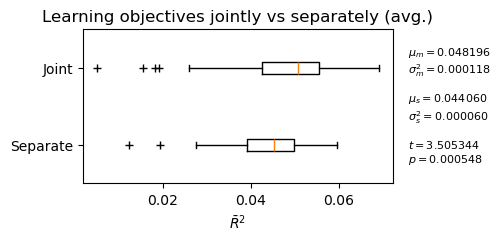

In [18]:
fig, ax = plt.subplots(figsize=(4, 2))

m, s = multi.mean(axis=1), single.mean(axis=1)
tstat, pval = ttest_ind(m, s, equal_var=False)

ax.boxplot(
    x=[s, m], tick_labels=['Separate', 'Joint'], 
    vert=False, sym='+', 
)
#ax.axvline(m.mean(), ymax=0.1, color='orange')

ax.set_xlabel(r'$\bar{R}^2$')
ax.set_title('Learning objectives jointly vs separately (avg.)')
#ax.legend()

txt = f"$\mu_m = {m.mean():2f}$ \n"
txt += f"$\sigma_m^2 = {m.var():2f}$ \n\n"
txt += f"$\mu_s = {s.mean():2f}$ \n"
txt += f"$\sigma_s^2 = {s.var():2f}$ \n\n"
txt += f"$t = {tstat:2f}$ \n"
txt += f"$p = {pval:2f}$"
ax.text(1.05, 0.9, txt, transform=ax.transAxes , fontsize=8, va='top');

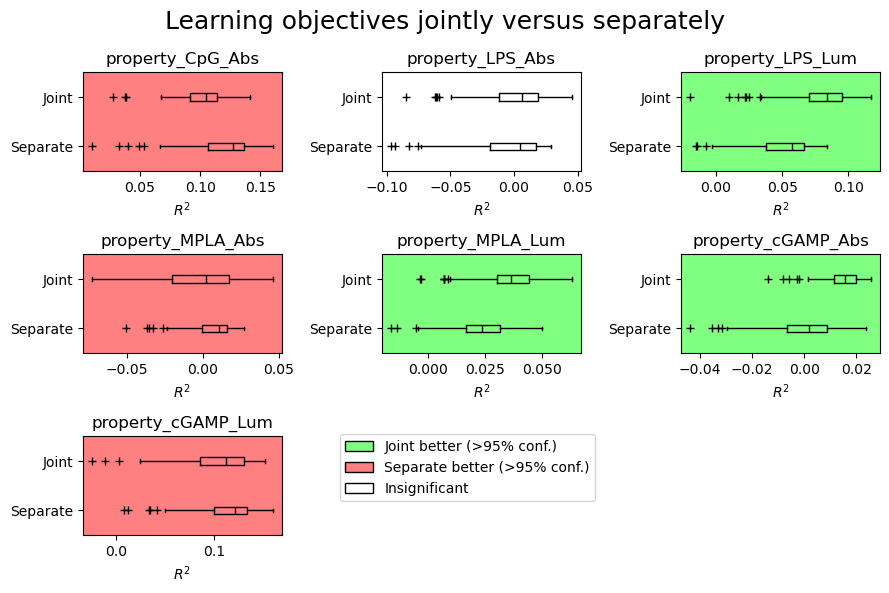

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(9, 6))
axs = axs.flatten()

for i, property_label in enumerate(properties):

    ax = axs[i]

    m, s = multi.iloc[:, i], single.iloc[:, i]
    tstat, pval = ttest_ind(m, s, equal_var=False)

    ax.boxplot(
        x=[s, m], tick_labels=['Separate', 'Joint'], 
        vert=False, sym='+', 
        medianprops={'color': 'black'}
    )

    color=(1, 1, 1)
    if pval < 0.05:
        if tstat > 0: color = (0.5, 1, 0.5)
        else: color = (1, 0.5, 0.5)
    ax.set_facecolor(color)
    ax.set_xlabel(r'$R^2$')
    ax.set_title(property_label)
    #ax.legend()

axs[-1].axis('off')
axs[-2].axis('off')

legend_elements = [
    Patch(facecolor=(0.5, 1, 0.5), edgecolor='black', label='Joint better (>95% conf.)'), 
    Patch(facecolor=(1, 0.5, 0.5), edgecolor='black', label='Separate better (>95% conf.)'), 
    Patch(facecolor=(1, 1, 1), edgecolor='black', label='Insignificant')
]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.525, 0.15), loc='lower center')
fig.suptitle('Learning objectives jointly versus separately', fontsize=18)

plt.tight_layout()

## Combinations

In [2]:
data_comb = pd.concat((
    pd.read_csv('rmlp_emb_combination_1.csv'), 
    pd.read_csv('rmlp_emb_combination_2.csv'), 
))
data_sep = pd.read_csv('rmlp_emb_uni_1.csv')

properties = list(data_sep.columns)

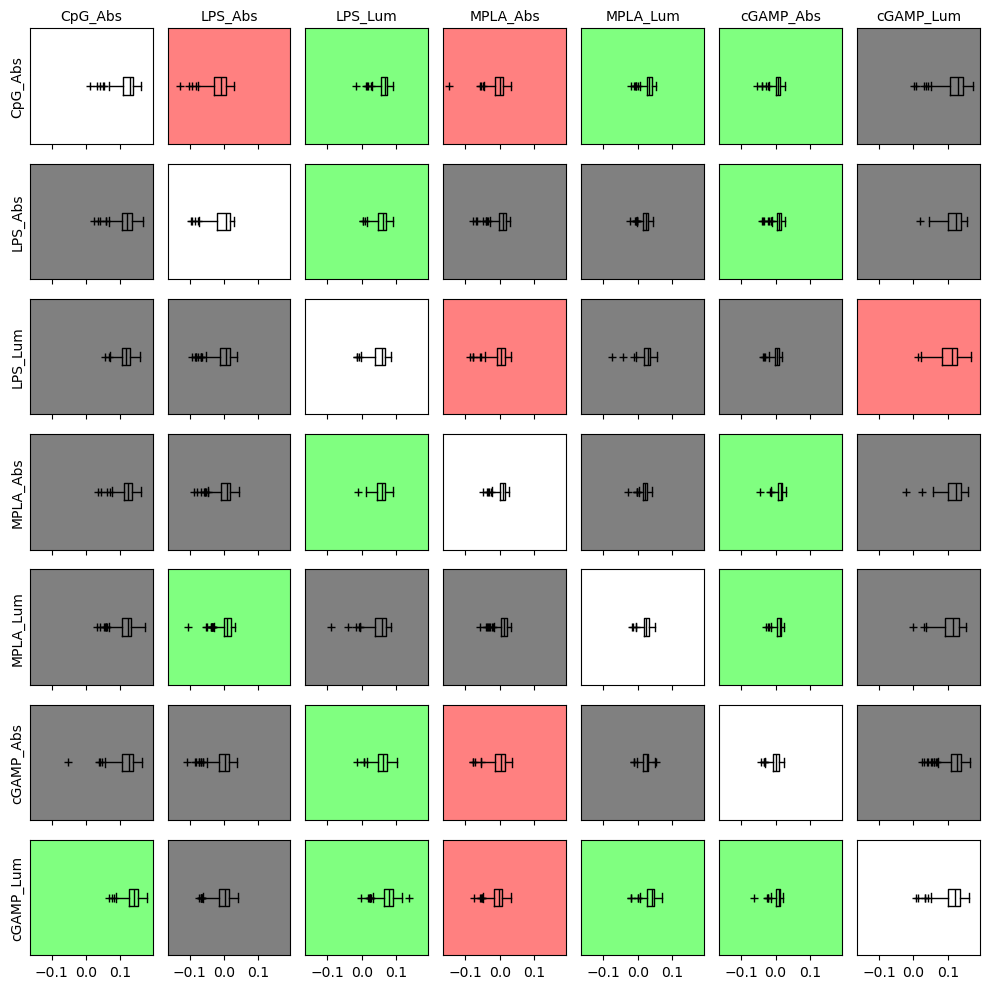

In [3]:
n = data_sep.shape[1]
fig, axs = plt.subplots(n, n, figsize=(10, 10), sharex=True)

for j in range(len(properties)):
    sep = data_sep.iloc[:, j]
    for i in range(len(properties)):

        ax = axs[i, j]

        if i == j:
            ax.boxplot(
                x=sep, 
                vert=False, sym='+', 
                medianprops={'color': 'black'}
            )
        else:
            sep = data_sep.iloc[:, j]
            comb = data_comb.loc[:, str(j) + str(i)]
        
            ax.boxplot(
                x=comb, 
                vert=False, sym='+', 
                medianprops={'color': 'black'}
            )

            tstat, pval = ttest_ind(comb, sep, equal_var=False)
    
            color=(0.5, 0.5, 0.5)
            if pval < 0.05:
                if tstat > 0: color = (0.5, 1, 0.5)
                else: color = (1, 0.5, 0.5)
            ax.set_facecolor(color)
    
        ax.set_yticks([])

for i, ax in enumerate(axs[0, :]): ax.set_title(properties[i][9:], fontsize=10)
for i, ax in enumerate(axs[:, 0]): ax.set_ylabel(properties[i][9:], fontsize=10)

plt.tight_layout()

Text(0.5, 1.0, 'Joint training as a regularizer')

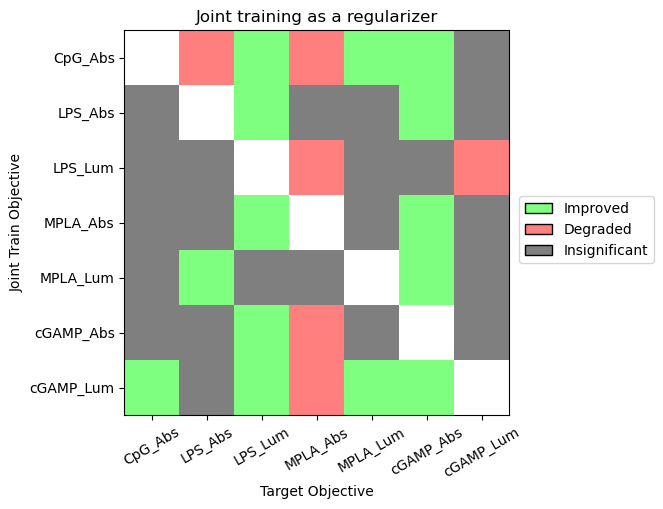

In [5]:
colors = np.ones((n, n, 3))
for j in range(len(properties)):
    sep = data_sep.iloc[:, j]
    for i in range(len(properties)):

        ax = axs[i, j]

        if i != j:
            comb = data_comb.loc[:, str(j) + str(i)]

            tstat, pval = ttest_ind(comb, sep, equal_var=False)

            
            if pval < 0.05:
                if tstat > 0: colors[i, j] = (0.5, 1, 0.5)
                else: colors[i, j] = (1, 0.5, 0.5)
            else:
                colors[i, j] = (0.5, 0.5, 0.5)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(colors)
ax.set_xticks(range(len(properties)))
ax.set_xticklabels([p[9:] for p in properties], rotation=30)
ax.set_yticks(range(len(properties)))
ax.set_yticklabels([p[9:] for p in properties])
ax.set_xlabel('Target Objective')
ax.set_ylabel('Joint Train Objective')

legend_elements = [
    Patch(facecolor=(0.5, 1, 0.5), edgecolor='black', label='Improved'), 
    Patch(facecolor=(1, 0.5, 0.5), edgecolor='black', label='Degraded'), 
    Patch(facecolor=(0.5, 0.5, 0.5), edgecolor='black', label='Insignificant')
]
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.4), loc='lower right')

ax.set_title('Joint training as a regularizer')